In [9]:
# imports
import numpy as np
import skimage
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.spatial import distance
import scipy 


##############################################
### Provided code - nothing to change here ###
##############################################

"""
Harris Corner Detector
Usage: Call the function harris(filename) for corner detection
Reference   (Code adapted from):
             http://www.kaij.org/blog/?p=89
             Kai Jiang - Harris Corner Detector in Python
             
"""
from pylab import *
from scipy import signal
from scipy import *
import numpy as np
from PIL import Image

def harris(filename, min_distance = 10, threshold = 0.1):
    """
    filename: Path of image file
    threshold: (optional)Threshold for corner detection
    min_distance : (optional)Minimum number of pixels separating 
     corners and image boundary
    """
    im = np.array(Image.open(filename).convert("L"))
    harrisim = compute_harris_response(im)
    filtered_coords = get_harris_points(harrisim,min_distance, threshold)
    plot_harris_points(im, filtered_coords)

def gauss_derivative_kernels(size, sizey=None):
    """ returns x and y derivatives of a 2D 
        gauss kernel array for convolutions """
    size = int(size)
    if not sizey:
        sizey = size
    else:
        sizey = int(sizey)
    y, x = mgrid[-size:size+1, -sizey:sizey+1]
    #x and y derivatives of a 2D gaussian with standard dev half of size
    # (ignore scale factor)
    gx = - x * exp(-(x**2/float((0.5*size)**2)+y**2/float((0.5*sizey)**2))) 
    gy = - y * exp(-(x**2/float((0.5*size)**2)+y**2/float((0.5*sizey)**2))) 
    return gx,gy

def gauss_kernel(size, sizey = None):
    """ Returns a normalized 2D gauss kernel array for convolutions """
    size = int(size)
    if not sizey:
        sizey = size
    else:
        sizey = int(sizey)
    x, y = mgrid[-size:size+1, -sizey:sizey+1]
    g = exp(-(x**2/float(size)+y**2/float(sizey)))
    return g / g.sum()

def compute_harris_response(im):
    """ compute the Harris corner detector response function 
        for each pixel in the image"""
    #derivatives
    gx,gy = gauss_derivative_kernels(3)
    imx = signal.convolve(im,gx, mode='same')
    imy = signal.convolve(im,gy, mode='same')
    #kernel for blurring
    gauss = gauss_kernel(3)
    #compute components of the structure tensor
    Wxx = signal.convolve(imx*imx,gauss, mode='same')
    Wxy = signal.convolve(imx*imy,gauss, mode='same')
    Wyy = signal.convolve(imy*imy,gauss, mode='same')   
    #determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy   
    return Wdet / Wtr

def get_harris_points(harrisim, min_distance=10, threshold=0.1):
    """ return corners from a Harris response image
        min_distance is the minimum nbr of pixels separating 
        corners and image boundary"""
    #find top corner candidates above a threshold
    corner_threshold = max(harrisim.ravel()) * threshold
    harrisim_t = (harrisim > corner_threshold) * 1    
    #get coordinates of candidates
    candidates = harrisim_t.nonzero()
    coords = [ (candidates[0][c],candidates[1][c]) for c in range(len(candidates[0]))]
    #...and their values
    candidate_values = [harrisim[c[0]][c[1]] for c in coords]    
    #sort candidates
    index = argsort(candidate_values)   
    #store allowed point locations in array
    allowed_locations = zeros(harrisim.shape)
    allowed_locations[min_distance:-min_distance,min_distance:-min_distance] = 1   
    #select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i][0]][coords[i][1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i][0]-min_distance):(coords[i][0]+min_distance),
                (coords[i][1]-min_distance):(coords[i][1]+min_distance)] = 0               
    return filtered_coords

def plot_harris_points(image, filtered_coords):
    """ plots corners found in image"""
    plt.figure()
    plt.gray()
    plt.imshow(image)
    plt.plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],'r*')
    plt.axis('off')
    plt.show()

# Usage: 
#harris('./path/to/image.jpg')


# Provided code for plotting inlier matches between two images

def plot_inlier_matches(ax, img1, img2, inliers):
    """
    Plot the matches between two images according to the matched keypoints
    :param ax: plot handle
    :param img1: left image
    :param img2: right image
    :inliers: x,y in the first image and x,y in the second image (Nx4)
    """
    res = np.hstack([img1, img2])
    ax.set_aspect('equal')
    ax.imshow(res, cmap='gray')
    
    ax.plot(inliers[:,0], inliers[:,1], '+r')
    ax.plot(inliers[:,2] + img1.shape[1], inliers[:,3], '+r')
    ax.plot([inliers[:,0], inliers[:,2] + img1.shape[1]],
            [inliers[:,1], inliers[:,3]], 'r', linewidth=0.4)
    ax.axis('off')
    
# Usage:
# fig, ax = plt.subplots(figsize=(20,10))
# plot_inlier_matches(ax, img1, img2, computed_inliers)


#######################################
### Your implementation starts here ###
#######################################

# See assignment page for the instructions!


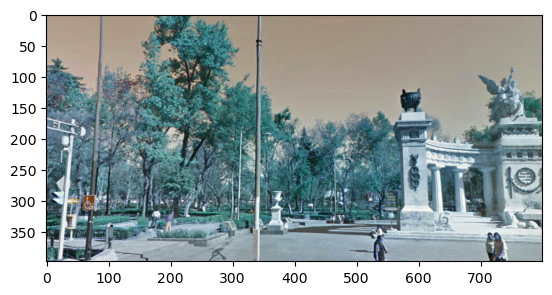

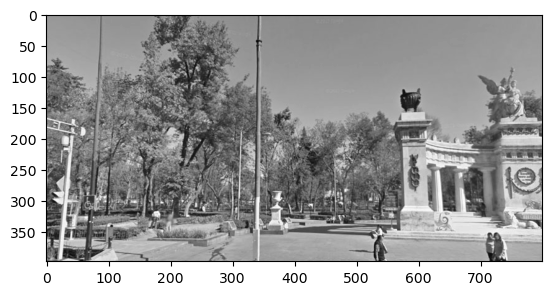

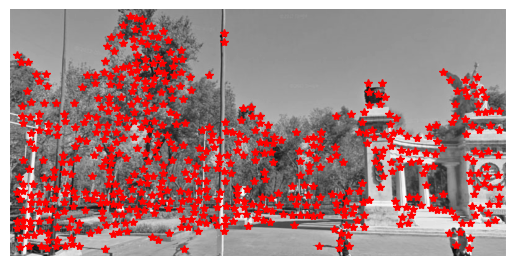

In [10]:
name = "left"
img = cv.imread("data_p1/{}.jpg".format(name))
plt.imshow(img)
gray = cv.cvtColor(img.astype(np.float32), cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray)

harrisim = compute_harris_response(gray)
corners = get_harris_points(harrisim)
plot_harris_points(gray, corners)

True

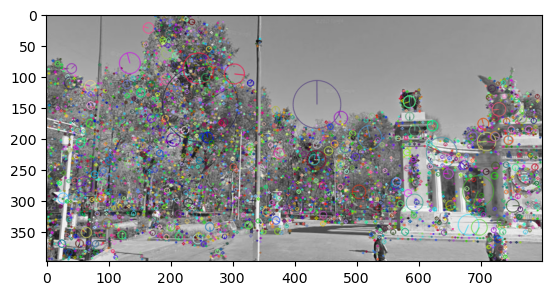

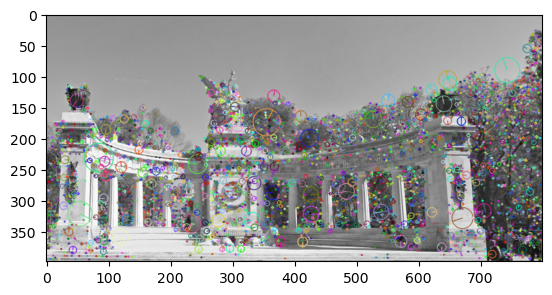

In [11]:
img_left = cv.imread("data_p1/{}.jpg".format("left"))
img_right = cv.imread("data_p1/{}.jpg".format("right"))


# class KeyPoint:
#     pt: cv2.typing.Point2f
#     size: float
#     angle: float
#     response: float
#     octave: int
#     class_id: int

sift = cv.SIFT_create()
_gray_left = cv.cvtColor(img_left,cv.COLOR_BGR2GRAY)
# des: (Number of Keypoints)×128.
kp_left, des_left = sift.detectAndCompute(_gray_left,None)
# print(des_left[0])
img_kp_left = cv.drawKeypoints(_gray_left, kp_left, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp_left)

# sift = cv.SIFT_create()
_gray_right = cv.cvtColor(img_right,cv.COLOR_BGR2GRAY)
kp_right, des_right = sift.detectAndCompute(_gray_right,None)
img_kp_right = cv.drawKeypoints(_gray_right, kp_right, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure()
plt.imshow(img_kp_right)

cv.imwrite('img_kp_right.jpg',img_kp_right)

In [12]:
# name = "left"
# im=Image.open("data_p1/{}.jpg".format(name)) 

# plt.figure()
# plt.imshow(im)

# # convert to grayscale, rescale intensities to [0,1]
# gray = np.asarray(im.convert('L'))
# gray = gray/255.0
# # print(gray)
# plt.figure()
# plt.imshow(gray)

# harrisim = compute_harris_response(gray)
# corners = get_harris_points(harrisim)
# plot_harris_points(gray, corners)

In [13]:
des_distance = distance.cdist(des_left,des_right,'sqeuclidean')
print(des_distance.min())
print(des_distance.shape)
matches = []
th = des_distance.min()*15
for i in range (des_distance.shape[0]):
    for j in range (des_distance.shape[1]):
        if des_distance[i][j] < th:
            matches.append((i,j))
# print(matches)
# matches = np.array(matches)


1322.0
(4408, 3484)


In [14]:
def matches_coord(matches):
    m=[]
    for i,j in matches:
        coord = np.zeros(4)
        coord[0], coord[1] = kp_left[i].pt
        coord[2], coord[3] = kp_right[j].pt
        # print(coord)
        m.append(coord)
    return m

def constructA(p):
    A=[]
    for xx,xy, yx,yy in p:
        A.append([-yx, -yy, -1, 0,0,0, xx*yx, xx*yy, xx])
        A.append([0,0,0, -yx, -yy, -1, xy*yx, xy*yy, xy])
    return np.array(A)

def calculate_res(h, m):
    xs = np.array(m)[:, 0:2]
    yt = np.zeros((len(m), 2))
    i=0
    for xx,xy, yx,yy in m:
        tmp = np.array([yx, yy, 1]).T
        mul = np.dot(h,tmp)
        yt[i] = mul[0:2]/mul[2]
        i=i+1
    res = np.sum((xs-yt)**2, axis=1)
    # print(xs[0], yt[0], res[0])
    return res

def find_inliers(residual, threshold):
    idx=[]
    res = []
    for i, r in enumerate(residual):
        if r<=threshold:
            idx.append(i)
            res.append(r)
    return idx, sum(res)/len(res)


C:\Users\fiona\AppData\Local\Temp\ipykernel_19804\2325660510.py:25: RuntimeWarning: divide by zero encountered in true_divide
  yt[i] = mul[0:2]/mul[2]


72 1.4360344112776255


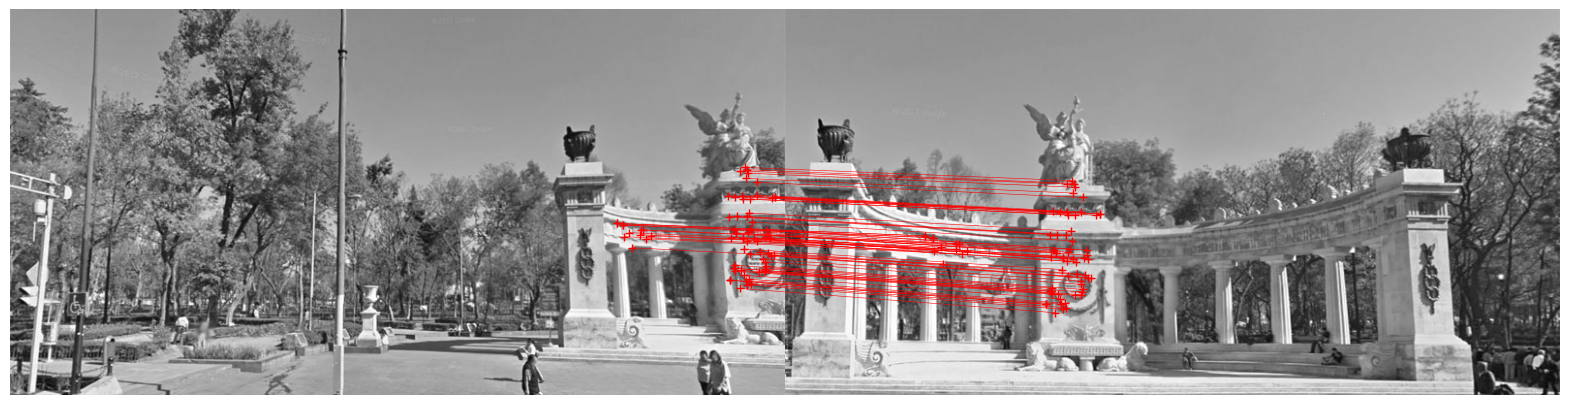

In [19]:
import random
# RANSAC
iteration = 2000
threshold = 5
max_inliers=0
H=np.zeros((3,3))
inliers=[]
out_avg_res=0
m = matches_coord(matches)

# for each iteration
for _ in range(iteration):
    # randomly select four matches
    p = random.sample(m, 4)
    # print(p)

    # find a model for these matches
    # Ah= 0
    A = constructA(p)
    U,s,V = np.linalg.svd(A)
    h = V[len(V)-1].reshape(3, 3)

    # calculate the distance of other matches with this model
    residual = calculate_res(h, m)

    # select close enough matches as inliers and reject the others
    inliers_idx, avg_res = find_inliers(residual, threshold)

    # select the model that have the most inliers
    if len(inliers_idx) > max_inliers:
        max_inliers = len(inliers_idx)
        H=h.copy()
        out_avg_res = avg_res
        inliers = [m[i] for i in inliers_idx]

print(len(inliers), out_avg_res)
fig, ax = plt.subplots(figsize=(20,10))
plot_inlier_matches(ax, _gray_left, _gray_right, np.array(inliers))
plt.savefig("inliers_matches.jpg")


In [16]:
def overlay_image(im1, im2, x_offset, y_offset):
    '''Mutates im1, placing im2 over it at a given offset.'''
    # print(im1.shape, im2.shape)
    new = np.zeros(im1.shape,dtype=im1.dtype)
    # im1[y_offset:y_offset+im2.shape[0], x_offset:x_offset+im2.shape[1]] += im2
    for i in range(im1.shape[0]):
        for j in range(im1.shape[1]):
            if im1[i][j]<=0:
                new[i][j] = im2[i][j] 
            else:
                new[i][j] = im1[i][j]
    
    plt.figure()
    plt.imshow(new)

def overlay_image_color(im1, im2):
    '''Mutates im1, placing im2 over it at a given offset.'''
    # print(im1.shape, im2.shape)
    new = np.zeros(im1.shape,dtype=im1.dtype)
    # im1[y_offset:y_offset+im2.shape[0], x_offset:x_offset+im2.shape[1]] += im2
    for i in range(im1.shape[0]):
        for j in range(im1.shape[1]):
            if im1[i,j,:].sum()<=0:
                new[i,j,:] = im2[i,j,:] 
            else:
                new[i,j,:] = im1[i,j,:]
    return new
    # cv.imshow("colored.png",new)
    # cv.waitKey(0)

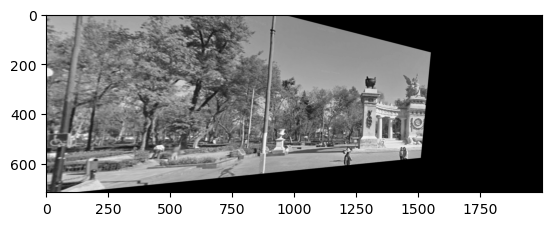

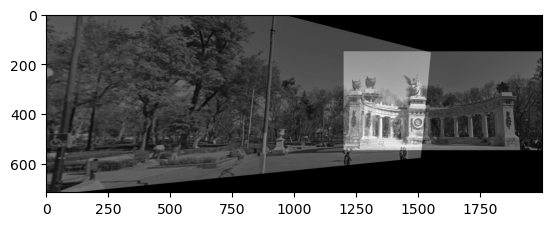

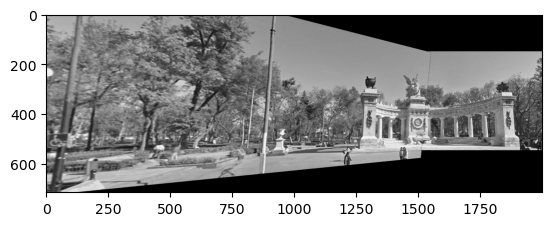

In [17]:
from skimage import transform
M, _ = cv.findHomography(np.array(m)[:, 2:4], np.array(m)[:, 0:2], cv.RANSAC,5.0)
matrix = np.array([[1, 0, -1200], [0, 1, -150], [0, 0, 1]])
test = np.dot(transform.ProjectiveTransform(M),matrix)
# m = transform.warp(_gray_left,M, output_shape=(_gray_left.shape[0], _gray_left.shape[1]*2),clip=False)
# plt.imshow(m)
shift = transform.ProjectiveTransform(matrix)
# image = cv.copyMakeBorder(_gray_left, 100, 100, 500, 500, cv.BORDER_CONSTANT)
out_shape = (int(_gray_left.shape[0]*1.8), int(_gray_left.shape[1]*2.5))
r = transform.warp(_gray_left, test, output_shape= out_shape,clip=False)
l = transform.warp(_gray_right,shift, output_shape=out_shape,clip=False)

# plt.figure()
# plt.imshow(f)
plt.figure()
plt.imshow(r)
plt.figure()
plt.imshow(r+l)
plt.imsave("test.png", r+l)
overlay_image(r,l,0,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

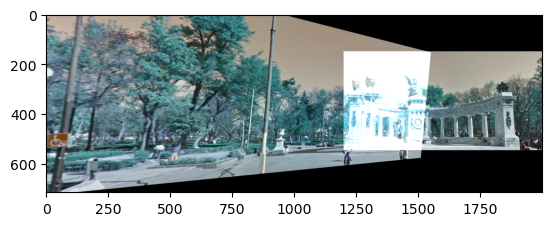

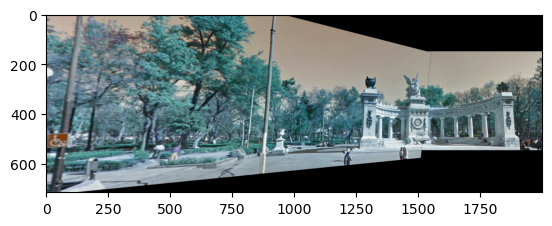

In [18]:
# create a color panorama
r_color = transform.warp(img_left, test, output_shape= out_shape,clip=False)
l_color = transform.warp(img_right,shift, output_shape=out_shape,clip=False)
plt.figure()
plt.imshow(r_color+l_color)

output = overlay_image_color(r_color,l_color)
plt.figure()
plt.imshow(output)
# output.convertTo(output, cv.CV_8UC3, 255.0); 
cv.imwrite('colored.jpg',output*255)